In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('original/train.csv')
test = pd.read_csv('original/test.csv')

In [3]:
train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [4]:
test.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [5]:
train.dtypes

tripid                         int64
additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [6]:
test.dtypes

tripid                         int64
additional_fare              float64
duration                       int64
meter_waiting                  int64
meter_waiting_fare           float64
meter_waiting_till_pickup      int64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
dtype: object

In [7]:
train.dropna(subset= ["pickup_time"])
train.dropna(subset= ["drop_time"])

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
17173,213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct
17174,213815405,10.5,858.0,115.0,0.0000,317.0,1/31/2020 23:39,1/31/2020 23:53,6.94540,79.8768,6.93574,79.9010,133.31,correct


In [8]:
# Here pickup_time variable is in object so we need to change its data type to datetime
train['pickup_time'] =  pd.to_datetime(train['pickup_time'], format='%m/%d/%Y %H:%M')
# Here drop_time variable is in object so we need to change its data type to datetime
train['drop_time'] =  pd.to_datetime(train['drop_time'], format='%m/%d/%Y %H:%M')

# Here pickup_time variable is in object so we need to change its data type to datetime
test['pickup_time'] =  pd.to_datetime(test['pickup_time'], format='%m/%d/%Y %H:%M')
# Here drop_time variable is in object so we need to change its data type to datetime
test['drop_time'] =  pd.to_datetime(test['drop_time'], format='%m/%d/%Y %H:%M')

In [9]:
train.dtypes

tripid                                int64
additional_fare                     float64
duration                            float64
meter_waiting                       float64
meter_waiting_fare                  float64
meter_waiting_till_pickup           float64
pickup_time                  datetime64[ns]
drop_time                    datetime64[ns]
pick_lat                            float64
pick_lon                            float64
drop_lat                            float64
drop_lon                            float64
fare                                float64
label                                object
dtype: object

In [10]:
train

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct
17173,213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct
17174,213815405,10.5,858.0,115.0,0.0000,317.0,2020-01-31 23:39:00,2020-01-31 23:53:00,6.94540,79.8768,6.93574,79.9010,133.31,correct


In [11]:
### we will saperate the pickup_time column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_time'].dt.year
train['Month'] = train['pickup_time'].dt.month
train['Date'] = train['pickup_time'].dt.day
train['Day'] = train['pickup_time'].dt.dayofweek
train['Hour'] = train['pickup_time'].dt.hour
train['Minute'] = train['pickup_time'].dt.minute

test['year'] = test['pickup_time'].dt.year
test['Month'] = test['pickup_time'].dt.month
test['Date'] = test['pickup_time'].dt.day
test['Day'] = test['pickup_time'].dt.dayofweek
test['Hour'] = test['pickup_time'].dt.hour
test['Minute'] = test['pickup_time'].dt.minute

In [12]:
train.dtypes

tripid                                int64
additional_fare                     float64
duration                            float64
meter_waiting                       float64
meter_waiting_fare                  float64
meter_waiting_till_pickup           float64
pickup_time                  datetime64[ns]
drop_time                    datetime64[ns]
pick_lat                            float64
pick_lon                            float64
drop_lat                            float64
drop_lon                            float64
fare                                float64
label                                object
year                                  int64
Month                                 int64
Date                                  int64
Day                                   int64
Hour                                  int64
Minute                                int64
dtype: object

In [13]:
train.isnull().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
year                           0
Month                          0
Date                           0
Day                            0
Hour                           0
Minute                         0
dtype: int64

In [14]:
test.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
year                         0
Month                        0
Date                         0
Day                          0
Hour                         0
Minute                       0
dtype: int64

In [15]:
train = train.drop(train[train['additional_fare'].isnull()].index, axis=0)
train = train.drop(train[train['duration'].isnull()].index, axis=0)
train = train.drop(train[train['meter_waiting'].isnull()].index, axis=0)
train = train.drop(train[train['meter_waiting_fare'].isnull()].index, axis=0)
train = train.drop(train[train['meter_waiting_till_pickup'].isnull()].index, axis=0)
train = train.drop(train[train['fare'].isnull()].index, axis=0)
train

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,Month,Date,Day,Hour,Minute
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,4,0,20
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,4,0,56
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,4,1,8
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,4,2,27
5,189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,4,5,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,4,22,7
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,4,23,7
17173,213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,4,23,21
17174,213815405,10.5,858.0,115.0,0.0000,317.0,2020-01-31 23:39:00,2020-01-31 23:53:00,6.94540,79.8768,6.93574,79.9010,133.31,correct,2020,1,31,4,23,39


In [16]:
from collections import Counter 
Counter(train["fare"]<0)

Counter({False: 16968})

In [17]:
train[train['pick_lat'] < -90]
train[train['pick_lat'] > 90]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,Month,Date,Day,Hour,Minute


In [18]:
train[train['pick_lon']< -180]
train[train['pick_lon']> 180]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,Month,Date,Day,Hour,Minute


In [19]:
train[train['drop_lat'] < -90]
train[train['drop_lat'] > 90]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,Month,Date,Day,Hour,Minute


In [20]:
train[train['drop_lon'] < -180]
train[train['drop_lon'] > 180]

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,Month,Date,Day,Hour,Minute


In [21]:
train.shape

(16968, 20)

In [22]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [23]:
train['distance'] = train[['pick_lon','pick_lat','drop_lon','drop_lat']].apply(haversine,axis=1)

In [24]:
test['distance'] = test[['pick_lon','pick_lat','drop_lon','drop_lat']].apply(haversine,axis=1)

In [25]:
train.label[train.label == 'correct'] = 1
train.label[train.label == 'incorrect'] = 0

C:\Users\SAMPATH-T\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SAMPATH-T\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,...,drop_lon,fare,label,year,Month,Date,Day,Hour,Minute,distance
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,...,79.8783,270.32,1,2019,11,1,4,0,20,5.092770
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,...,79.8923,197.85,1,2019,11,1,4,0,56,3.168058
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,...,79.9146,301.64,1,2019,11,1,4,1,8,6.305395
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,...,79.8971,82.30,1,2019,11,1,4,2,27,0.861946
5,189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,...,79.8649,1065.02,1,2019,11,1,4,5,38,24.207039


In [27]:
train.nunique()

tripid                       16965
additional_fare                 28
duration                      4053
meter_waiting                 1896
meter_waiting_fare            3730
meter_waiting_till_pickup      702
pickup_time                  15439
drop_time                    15487
pick_lat                     13132
pick_lon                      2960
drop_lat                     13278
drop_lon                      3212
fare                         13752
label                            2
year                             2
Month                            3
Date                            31
Day                              7
Hour                            24
Minute                          60
distance                     16693
dtype: int64

In [28]:
Counter(train['distance'] == 0)

Counter({False: 16931, True: 37})

In [29]:
#we will remove the rows whose distance value is zero

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(16931, 21)

In [30]:
drop = ['pickup_time', 'pick_lon', 'pick_lat','drop_lon', 'drop_lat', 'drop_lat','pickup_time','drop_time']
train = train.drop(drop, axis = 1)

In [31]:

drop = ['pickup_time', 'pick_lon', 'pick_lat','drop_lon', 'drop_lat', 'drop_lat','pickup_time','drop_time']
test = test.drop(drop, axis = 1)

In [32]:
train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,year,Month,Date,Day,Hour,Minute,distance
0,189123628,10.5,834.0,56.0,0.0000,64.0,270.32,1,2019,11,1,4,0,20,5.092770
1,189125358,10.5,791.0,47.0,0.0000,134.0,197.85,1,2019,11,1,4,0,56,3.168058
2,189125719,10.5,1087.0,80.0,0.0000,61.0,301.64,1,2019,11,1,4,1,8,6.305395
3,189127273,10.5,598.0,271.0,15.6638,68.0,82.30,1,2019,11,1,4,2,27,0.861946
5,189129552,10.5,3407.0,182.0,0.0000,112.0,1065.02,1,2019,11,1,4,5,38,24.207039


In [33]:
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')
train.dtypes
train

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,label,year,Month,Date,Day,Hour,Minute,distance
0,189123628,10.5,834.0,56.0,0.0000,64.0,270.32,1,2019,11,1,4,0,20,5.092770
1,189125358,10.5,791.0,47.0,0.0000,134.0,197.85,1,2019,11,1,4,0,56,3.168058
2,189125719,10.5,1087.0,80.0,0.0000,61.0,301.64,1,2019,11,1,4,1,8,6.305395
3,189127273,10.5,598.0,271.0,15.6638,68.0,82.30,1,2019,11,1,4,2,27,0.861946
5,189129552,10.5,3407.0,182.0,0.0000,112.0,1065.02,1,2019,11,1,4,5,38,24.207039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,213803193,10.5,838.0,93.0,5.4219,451.0,198.26,1,2020,1,31,4,22,7,2.105376
17172,213812756,10.5,2151.0,428.0,0.0000,39.0,581.23,1,2020,1,31,4,23,7,10.868377
17173,213813930,10.5,263.0,9.0,0.0000,110.0,76.20,1,2020,1,31,4,23,21,1.045518
17174,213815405,10.5,858.0,115.0,0.0000,317.0,133.31,1,2020,1,31,4,23,39,2.879077


In [34]:
test['year'] = test['year'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')
test.dtypes

tripid                         int64
additional_fare              float64
duration                       int64
meter_waiting                  int64
meter_waiting_fare           float64
meter_waiting_till_pickup      int64
fare                         float64
year                           int64
Month                          int64
Date                           int64
Day                            int64
Hour                           int64
Minute                         int64
distance                     float64
dtype: object

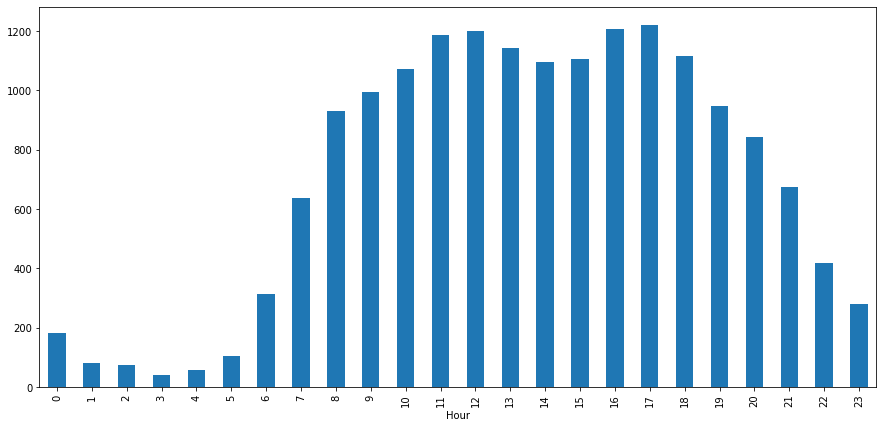

In [35]:
#Count plot on passenger count
# plt.figure(figsize=(15,7))
# sns.countplot(x="distance", data=train)

plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()


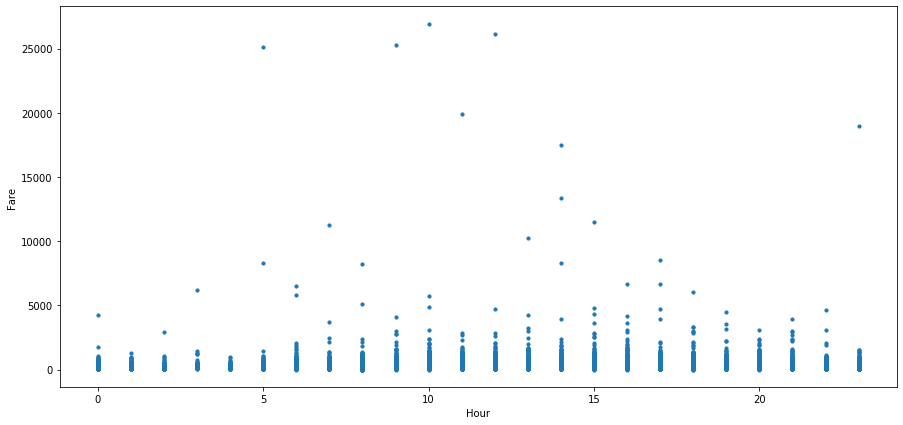

In [36]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

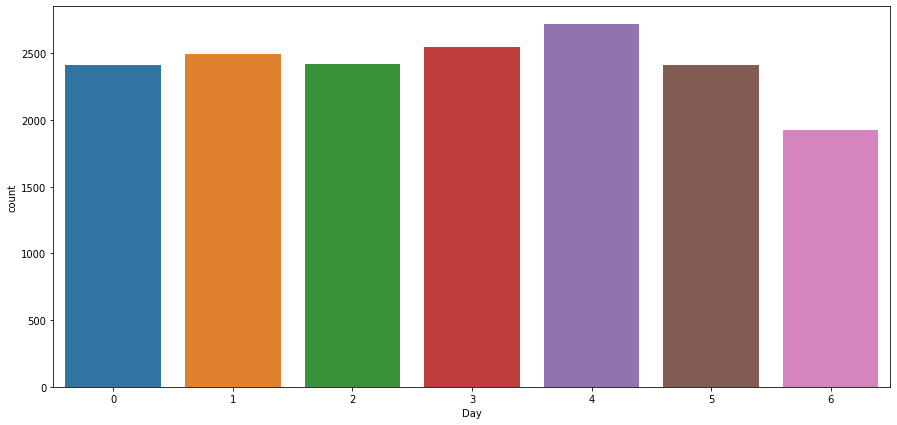

In [37]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

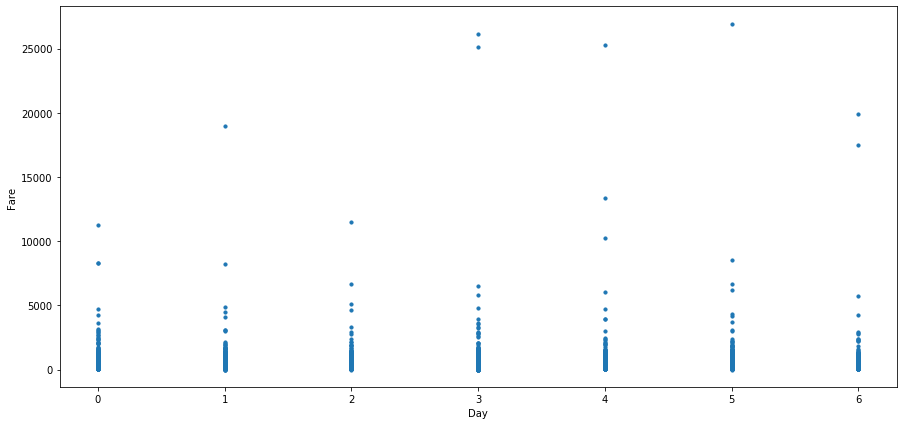

In [38]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

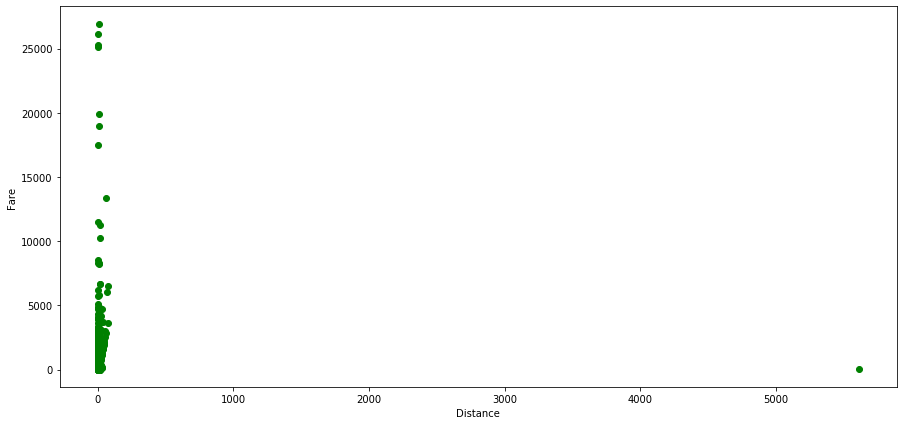

In [39]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

fare


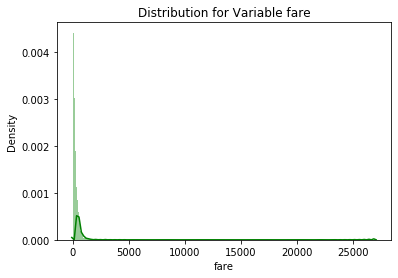

distance


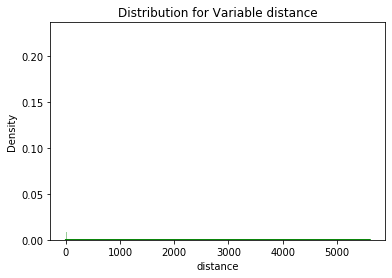

In [40]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [41]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare'] = np.log1p(train['fare'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare


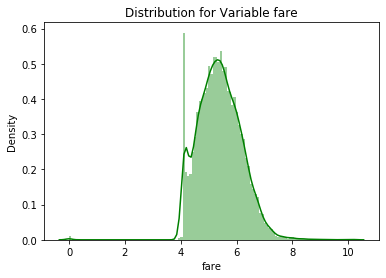

distance


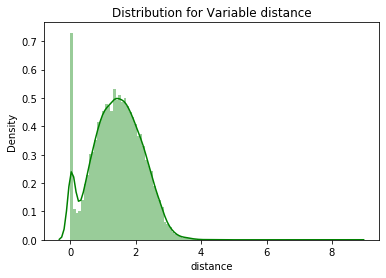

In [42]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

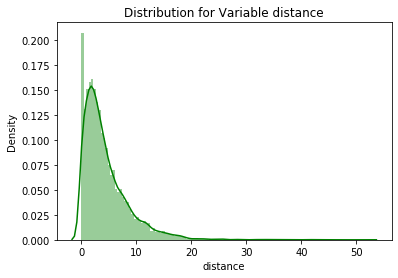

In [43]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

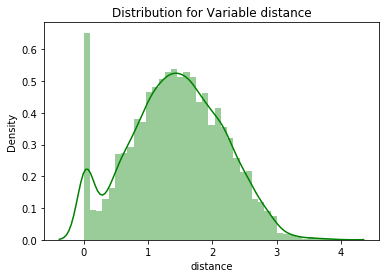

In [44]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [45]:
# train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'label'], 
                         train.iloc[:, 0], test_size = 0.3, random_state = 1)


X_train, X_test, y_train, y_test = train_test_split(X, Y)

NameError: name 'X' is not defined

In [ ]:
print(X_train.shape)
print(X_test.shape)